<a href="https://colab.research.google.com/github/NavapolSan/IndependentStudy/blob/main/Forecasting_DHF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
from datetime import datetime
# plt.style.use('fivethirtyeight')
%cd /content/drive/MyDrive/IS/

/content/drive/MyDrive/IS


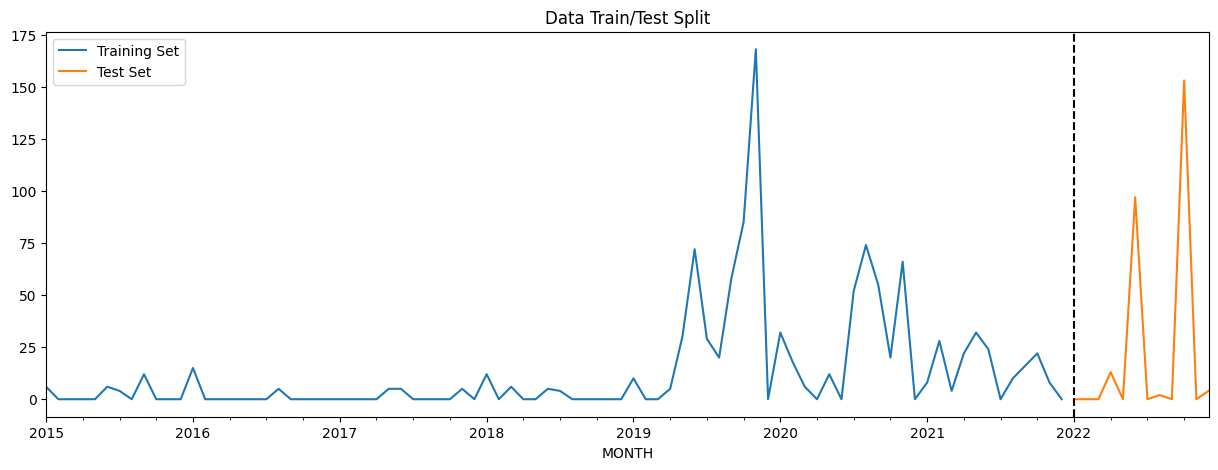

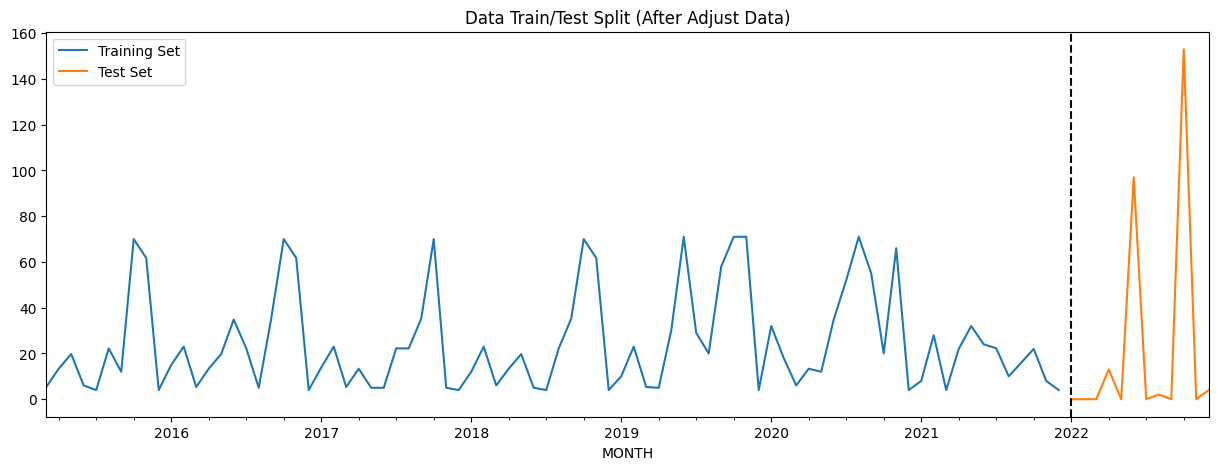

<ipython-input-3-f27e4414016c>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['RAIN_ACCUM (mm)', 'HUMIDIY (%)','MAX_TEMP (°C)', 'MIN_TEMP (°C)', 'AVG_TEMP (°C)', 'month'],inplace=True)
<ipython-input-3-f27e4414016c>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['RAIN_ACCUM (mm)', 'HUMIDIY (%)','MAX_TEMP (°C)', 'MIN_TEMP (°C)', 'AVG_TEMP (°C)', 'month'],inplace=True)


In [ ]:
## Data Preparation
df = pd.read_csv('data.csv')
df['MONTH'] = pd.to_datetime(df["MONTH"])
df.set_index('MONTH',inplace=True)
df = df[['PATIENT', 'RAIN_ACCUM (mm)', 'HUMIDIY (%)','MAX_TEMP (°C)', 'MIN_TEMP (°C)', 'AVG_TEMP (°C)']]
df['month'] = df.index
df['month_'] = [1 if x.strftime('%m') == '01' else
                2 if x.strftime('%m') == '02' else
                3 if x.strftime('%m') == '03' else
                4 if x.strftime('%m') == '04' else
                5 if x.strftime('%m') == '05' else
                6 if x.strftime('%m') == '06' else
                7 if x.strftime('%m') == '07' else
                8 if x.strftime('%m') == '08' else
                9 if x.strftime('%m') == '09' else
                10 if x.strftime('%m') == '10' else
                11 if x.strftime('%m') == '11' else
                12 if x.strftime('%m') == '12' else
                pd.NA for x in df['month']]

df['seasonal'] = [1 if x.strftime('%m') == '01' else
                1 if x.strftime('%m') == '02' else
                1 if x.strftime('%m') == '03' else
                2 if x.strftime('%m') == '04' else
                2 if x.strftime('%m') == '05' else
                2 if x.strftime('%m') == '06' else
                3 if x.strftime('%m') == '07' else
                3 if x.strftime('%m') == '08' else
                3 if x.strftime('%m') == '09' else
                4 if x.strftime('%m') == '10' else
                4 if x.strftime('%m') == '11' else
                4 if x.strftime('%m') == '12' else
                pd.NA for x in df['month']]

# Before Adjust Data
train = df.loc[df.index < '2022-01-31']
test = df.loc[df.index >= '2022-01-31']

fig, ax = plt.subplots(figsize=(15, 5))
train['PATIENT'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['PATIENT'].plot(ax=ax, label='Test Set')
ax.axvline('2022-01-31', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()


## Adjust on Train Set

for i in df['month_'].unique():
  df.loc[(df['PATIENT']==0) & (df['month_']==i) & (df.index < '2022-01-31'),'PATIENT'] = df.loc[(df['PATIENT']!=0) & (df['month_']==i),'PATIENT'].mean()
df.loc[(df['PATIENT']>71) & (df.index < '2022-01-31 '),'PATIENT'] = 71

list_ = ['PATIENT', 'RAIN_ACCUM (mm)', 'HUMIDIY (%)','MAX_TEMP (°C)', 'MIN_TEMP (°C)', 'AVG_TEMP (°C)']
for i in range(2):
  for x in list_:
    df[f'{x}_{i+1}'] = df[x].shift(i+1)

df.drop(['2015-01-31','2015-02-28'],inplace=True)

train = df.loc[df.index < '2022-01-31']
test = df.loc[df.index >= '2022-01-31']

fig, ax = plt.subplots(figsize=(15, 5))
train['PATIENT'].plot(ax=ax, label='Training Set', title='Data Train/Test Split (After Adjust Data)')
test['PATIENT'].plot(ax=ax, label='Test Set')
ax.axvline('2022-01-31', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()


# train.drop(columns=['RAIN_ACCUM (mm)', 'HUMIDIY (%)','MAX_TEMP (°C)', 'MIN_TEMP (°C)', 'AVG_TEMP (°C)', 'month', 'month_'],inplace=True)
# valid.drop(columns=['RAIN_ACCUM (mm)', 'HUMIDIY (%)','MAX_TEMP (°C)', 'MIN_TEMP (°C)', 'AVG_TEMP (°C)', 'month', 'month_'],inplace=True)
# test.drop(columns=['RAIN_ACCUM (mm)', 'HUMIDIY (%)','MAX_TEMP (°C)', 'MIN_TEMP (°C)', 'AVG_TEMP (°C)', 'month', 'month_'],inplace=True)

train.drop(columns=['RAIN_ACCUM (mm)', 'HUMIDIY (%)','MAX_TEMP (°C)', 'MIN_TEMP (°C)', 'AVG_TEMP (°C)', 'month'],inplace=True)
test.drop(columns=['RAIN_ACCUM (mm)', 'HUMIDIY (%)','MAX_TEMP (°C)', 'MIN_TEMP (°C)', 'AVG_TEMP (°C)', 'month'],inplace=True)

In [ ]:
# print('Correlation on Train Set')
# plt.figure(figsize=(10, 8))
# heatmap = sns.heatmap(train.corr(), cmap='vlag', vmin=-0.5, vmax=1, annot=True)
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
# plt.show()
# display(train.corr()['PATIENT'].abs().sort_values().round(2))
# print('='*100,'\n')

# print('Correlation on Test Set')
# plt.figure(figsize=(10, 8))
# heatmap = sns.heatmap(test.corr(), cmap='vlag', vmin=-0.5, vmax=1, annot=True)
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
# plt.show()
# display(test.corr()['PATIENT'].abs().sort_values().round(2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_absolute_percentage_error
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# **Grid Search for Best Params**

In [ ]:
# =============================================================== XGBoost ===============================================================
# FEATURE_ALL = train.drop(columns='PATIENT').columns
# FEATURE_COL = ['RAIN_ACCUM (mm)_1', 'seasonal', 'HUMIDIY (%)_1', 'PATIENT_1', 'RAIN_ACCUM (mm)_2', 'month_', 'MIN_TEMP (°C)_2']

# TARGET = 'PATIENT'

# parameters = {'nthread':[10],
#               'objective':['reg:linear'],
#               'eval_metric':['rmse'],
#               'reg_alpha':[0, 1],
#               'reg_lambda' : [0, 1],
#               'learning_rate': [0.01, 0.05, 0.1], #so called eta value
#               'max_depth': [3, 5, 7, 9],
#               'min_child_weight': range(1, 6, 2),
#               'subsample': [0.5, 0.7],
#               'n_estimators': [100, 300, 500]}

# list_ = [FEATURE_ALL,FEATURE_COL]


# # 1. No Data Transformation
# print('===== 1. No Data Transformation =====')
# for i in list_:
#   train1 = train.loc[train.index < '2020-01-31']
#   valid1 = train.loc[(train.index >= '2020-01-31') & (train.index < '2022-01-31')]

#   X_train = train1[i]
#   y_train = train1[TARGET]

#   X_valid = valid1[i]
#   y_valid = valid1[TARGET]

#   best_xgb = xgb.XGBRegressor()
#   xgb_grid = GridSearchCV(best_xgb,
#                           parameters,
#                           cv = 5,
#                           n_jobs = -1,
#                           verbose=True)

#   xgb_grid.fit(X_train, y_train,
#               eval_set=[(X_train, y_train), (X_valid, y_valid)],
#                verbose=500)

#   print(f'Best Score for {i}: {xgb_grid.best_score_}')
#   print(f'Best Params for {i}: {xgb_grid.best_params_}')


# # 2. Log Transformation
# print('===== 2. Log Transformation =====')
# for i in list_:
#   train2 = train.loc[train.index < '2020-01-31']
#   valid2 = train.loc[(train.index >= '2020-01-31') & (train.index < '2022-01-31')]

#   X_train_log = train2[i]
#   y_train_log = train2[TARGET]
#   y_train_log = np.log(y_train_log)


#   X_valid_log = valid2[i]
#   y_valid_log = valid2[TARGET]
#   y_valid_log = np.log(y_valid_log)

#   best_xgb = xgb.XGBRegressor()
#   xgb_grid = GridSearchCV(best_xgb,
#                           parameters,
#                           cv = 5,
#                           n_jobs = -1,
#                           verbose=True)

#   xgb_grid.fit(X_train_log, y_train_log,
#               eval_set=[(X_train_log, y_train_log), (X_valid_log, y_valid_log)],
#               verbose=100)

#   print(f'Best Score for {i}: {xgb_grid.best_score_}')
#   print(f'Best Params for {i}: {xgb_grid.best_params_}')


# # 3. Standardization
# print('===== 3. Standardization Transformation =====')
# for i in list_:
#   train3 = train.loc[train.index < '2020-01-31']
#   valid3 = train.loc[(train.index >= '2020-01-31') & (train.index < '2022-01-31')]

#   scaler1 = StandardScaler()
#   scaler2 = StandardScaler()

#   X_train_std = train3[i]
#   y_train_std = train3[TARGET]
#   y_train_std = scaler1.fit_transform(y_train_std.values.reshape(-1,1))

#   X_valid_std = valid3[i]
#   y_valid_std = valid3[TARGET]
#   y_valid_std = scaler2.fit_transform(y_valid_std.values.reshape(-1,1))

#   best_xgb = xgb.XGBRegressor()
#   xgb_grid = GridSearchCV(best_xgb,
#                           parameters,
#                           cv = 5,
#                           n_jobs = -1,
#                           verbose=True)

#   xgb_grid.fit(X_train_std, y_train_std,
#               eval_set=[(X_train_std, y_train_std), (X_valid_std, y_valid_std)],
#               verbose=100)

#   print(f'Best Score for {i}: {xgb_grid.best_score_}')
#   print(f'Best Params for {i}: {xgb_grid.best_params_}')


# # 4. Normalization
# print('===== 4. Normalization Transformation =====')
# for i in list_:
#   train4 = train.loc[train.index < '2020-01-31']
#   valid4 = train.loc[(train.index >= '2020-01-31') & (train.index < '2022-01-31')]

#   scaler1 = MinMaxScaler(feature_range=(0,1))
#   scaler2 = MinMaxScaler(feature_range=(0,1))

#   X_train_mm = train4[i]
#   y_train_mm = train4[TARGET]
#   y_train_mm = scaler1.fit_transform(y_train_mm.values.reshape(-1,1))

#   X_valid_mm = valid4[i]
#   y_valid_mm = valid4[TARGET]
#   y_valid_mm = scaler2.fit_transform(y_valid_mm.values.reshape(-1,1))

#   best_xgb = xgb.XGBRegressor()
#   xgb_grid = GridSearchCV(best_xgb,
#                           parameters,
#                           cv = 5,
#                           n_jobs = -1,
#                           verbose=True)

#   xgb_grid.fit(X_train_mm, y_train_mm,
#               eval_set=[(X_train_mm, y_train_mm), (X_valid_mm, y_valid_mm)],
#               verbose=100)

#   print(f'Best Score for {i}: {xgb_grid.best_score_}')
#   print(f'Best Params for {i}: {xgb_grid.best_params_}')

In [ ]:
# =============================================================== LightGBM ===============================================================
# FEATURE_ALL = train.drop(columns='PATIENT').columns
# FEATURE_COL = ['RAIN_ACCUM (mm)_1', 'seasonal', 'HUMIDIY (%)_1', 'PATIENT_1', 'RAIN_ACCUM (mm)_2', 'month_', 'MIN_TEMP (°C)_2']

# TARGET = 'PATIENT'

# parameters = {
#               'objective':['regression'],
#               'metric':['rmse'],
#               'reg_lambda' : [0, 0.5],
#               'learning_rate': [0.03, 0.05, 0.07, 0.1], #so called eta value
#               'max_depth': [3, 5, 7, 9, 12],
#               'subsample': [0.5, 0.7],
#               'n_estimators': [100, 150, 300],
#               'num_leaves' : list(range(21,41,10)),
#               'silent' : [1],
#               'feature_fraction' : [ 0.5, 1],
#               'colsample_bytree': [0.5, 1],
#               'bagging_fraction' : [0.5, 1],
#               'random_state' : [1]
#               }

# list_ = [FEATURE_ALL,FEATURE_COL]



# # 1. No Data Transformation
# print('===== 1. No Data Transformation =====')
# for i in list_:
#   train1 = train.loc[train.index < '2020-01-31']
#   valid1 = train.loc[(train.index >= '2020-01-31') & (train.index < '2022-01-31')]

#   X_train = train1[i]
#   y_train = train1[TARGET]

#   X_valid = valid1[i]
#   y_valid = valid1[TARGET]

#   best_lght = LGBMRegressor()
#   lght_grid = GridSearchCV(best_lght,
#                         parameters,
#                         cv = 5,
#                         n_jobs = 10,
#                         verbose=0)

#   lght_grid.fit(X_train, y_train,
#               eval_set=[(X_train, y_train), (X_valid, y_valid)],
#                verbose=500)

#   print(f'Best Score for {i}: {lght_grid.best_score_}')
#   print(f'Best Params for {i}: {lght_grid.best_params_}')


# # 2. Log Transformation
# print('===== 2. Log Transformation =====')
# for i in list_:
#   train2 = train.loc[train.index < '2020-01-31']
#   valid2 = train.loc[(train.index >= '2020-01-31') & (train.index < '2022-01-31')]

#   X_train_log = train2[i]
#   y_train_log = train2[TARGET]
#   y_train_log = np.log(y_train_log)


#   X_valid_log = valid2[i]
#   y_valid_log = valid2[TARGET]
#   y_valid_log = np.log(y_valid_log)

#   best_lght = LGBMRegressor()
#   lght_grid = GridSearchCV(best_lght,
#                         parameters,
#                         cv = 5,
#                         n_jobs = 10,
#                         verbose=0)

#   lght_grid.fit(X_train_log, y_train_log,
#               eval_set=[(X_train_log, y_train_log), (X_valid_log, y_valid_log)],
#                verbose=500)

#   print(f'Best Score for {i}: {lght_grid.best_score_}')
#   print(f'Best Params for {i}: {lght_grid.best_params_}')


# # 3. Standardization
# print('===== 3. Standardization Transformation =====')
# for i in list_:
#   train3 = train.loc[train.index < '2020-01-31']
#   valid3 = train.loc[(train.index >= '2020-01-31') & (train.index < '2022-01-31')]

#   scaler1 = StandardScaler()
#   scaler2 = StandardScaler()

#   X_train_std = train3[i]
#   y_train_std = train3[TARGET]
#   y_train_std = scaler1.fit_transform(y_train_std.values.reshape(-1,1))

#   X_valid_std = valid3[i]
#   y_valid_std = valid3[TARGET]
#   y_valid_std = scaler2.fit_transform(y_valid_std.values.reshape(-1,1))

#   best_lght = LGBMRegressor()
#   lght_grid = GridSearchCV(best_lght,
#                         parameters,
#                         cv = 5,
#                         n_jobs = 10,
#                         verbose=0)

#   lght_grid.fit(X_train_std, y_train_std,
#               eval_set=[(X_train_std, y_train_std), (X_valid_std, y_valid_std)],
#                verbose=500)

#   print(f'Best Score for {i}: {lght_grid.best_score_}')
#   print(f'Best Params for {i}: {lght_grid.best_params_}')


# # 4. Normalization
# print('===== 4. Normalization Transformation =====')
# for i in list_:
#   train4 = train.loc[train.index < '2020-01-31']
#   valid4 = train.loc[(train.index >= '2020-01-31') & (train.index < '2022-01-31')]

#   scaler1 = MinMaxScaler(feature_range=(0,1))
#   scaler2 = MinMaxScaler(feature_range=(0,1))

#   X_train_mm = train4[i]
#   y_train_mm = train4[TARGET]
#   y_train_mm = scaler1.fit_transform(y_train_mm.values.reshape(-1,1))

#   X_valid_mm = valid4[i]
#   y_valid_mm = valid4[TARGET]
#   y_valid_mm = scaler2.fit_transform(y_valid_mm.values.reshape(-1,1))

#   best_lght = LGBMRegressor()
#   lght_grid = GridSearchCV(best_lght,
#                         parameters,
#                         cv = 5,
#                         n_jobs = 10,
#                         verbose=0)

#   lght_grid.fit(X_train_mm, y_train_mm,
#               eval_set=[(X_train_mm, y_train_mm), (X_valid_mm, y_valid_mm)],
#                verbose=500)

#   print(f'Best Score for {i}: {lght_grid.best_score_}')
#   print(f'Best Params for {i}: {lght_grid.best_params_}')

# **Implement**

In [ ]:
result_train = train.loc[train.index < '2020-01-31'][['PATIENT']]
result_valid = train.loc[(train.index >= '2020-01-31') & (train.index < '2022-01-31')][['PATIENT']]
result_test = test[['PATIENT']].copy()

FEATURE_ALL = train.drop(columns='PATIENT').columns
FEATURE_COR = ['RAIN_ACCUM (mm)_1', 'seasonal', 'HUMIDIY (%)_1', 'PATIENT_1', 'RAIN_ACCUM (mm)_2', 'month_', 'MIN_TEMP (°C)_2']
# FEATURE_COR = ['RAIN_ACCUM (mm)_1', 'HUMIDIY (%)_1', 'PATIENT_1', 'RAIN_ACCUM (mm)_2', 'MIN_TEMP (°C)_2']
TARGET = 'PATIENT'

train_ = train.loc[train.index < '2020-01-31']
valid_ = train.loc[(train.index >= '2020-01-31') & (train.index < '2022-01-31')]
test_ = test.copy()

In [ ]:
# All Features

#1. No Data Transformation

X_train = train_[FEATURE_ALL]
y_train = train_[TARGET]

X_valid = valid_[FEATURE_ALL]
y_valid = valid_[TARGET]

X_test = test_[FEATURE_ALL]

reg1_xgb_all = xgb.XGBRegressor(nthread=10, objective='reg:linear', eval_metric= 'rmse', reg_alpha= 0, reg_lambda=0, learning_rate=0.01, max_depth=7, min_child_weight=1, subsample=0.5,n_estimators=300)
reg1_lgbm_all = LGBMRegressor(objective='regression', metric= 'rmse', reg_lambda=0.5, learning_rate=0.03, max_depth=3, subsample=0.5, n_estimators=100, num_leaves=21, silent=1, feature_fraction=0.5, colsample_bytree=0.5, bagging_fraction=0.5,random_state=1)

reg1_xgb_all.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)
reg1_lgbm_all.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)


result_train['xgb1_all'] = reg1_xgb_all.predict(X_train)
result_train['lgbm1_all'] = reg1_lgbm_all.predict(X_train)

result_valid['xgb1_all'] = reg1_xgb_all.predict(X_valid)
result_valid['lgbm1_all'] = reg1_lgbm_all.predict(X_valid)

result_test['xgb1_all'] = reg1_xgb_all.predict(X_test)
result_test['lgbm1_all'] = reg1_lgbm_all.predict(X_test)


# =============================================================================================================================================================================================================================================


#2. Log Transformation

X_train = train_[FEATURE_ALL]
y_train = train_[TARGET]
y_train = np.log(y_train)

X_valid = valid_[FEATURE_ALL]
y_valid = valid_[TARGET]
y_valid = np.log(y_valid)

X_test = test[FEATURE_ALL]

reg2_xgb_all = xgb.XGBRegressor(nthread=10, objective='reg:linear', eval_metric= 'rmse', reg_alpha= 0, reg_lambda=0, learning_rate=0.01, max_depth=9, min_child_weight=1, subsample=0.5,n_estimators=300)
reg2_lgbm_all = LGBMRegressor(objective='regression', metric= 'rmse', reg_lambda=0.5, learning_rate=0.03, max_depth=3, subsample=0.5, n_estimators=100, num_leaves=21, silent=1, feature_fraction=0.5, colsample_bytree=0.5, bagging_fraction=0.5,random_state=1)

reg2_xgb_all.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)
reg2_lgbm_all.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)


result_train['xgb2_all'] = reg2_xgb_all.predict(X_train)
result_train['lgbm2_all'] = reg2_lgbm_all.predict(X_train)
result_train['xgb2_all'] = result_train['xgb2_all'].apply(lambda x: np.exp(x))
result_train['lgbm2_all'] = result_train['lgbm2_all'].apply(lambda x: np.exp(x))

result_valid['xgb2_all'] = reg2_xgb_all.predict(X_valid)
result_valid['lgbm2_all'] = reg2_lgbm_all.predict(X_valid)
result_valid['xgb2_all'] = result_valid['xgb2_all'].apply(lambda x: np.exp(x))
result_valid['lgbm2_all'] = result_valid['lgbm2_all'].apply(lambda x: np.exp(x))

result_test['xgb2_all'] = reg2_xgb_all.predict(X_test)
result_test['lgbm2_all'] = reg2_lgbm_all.predict(X_test)
result_test['xgb2_all'] = result_test['xgb2_all'].apply(lambda x: np.exp(x))
result_test['lgbm2_all'] = result_test['lgbm2_all'].apply(lambda x: np.exp(x))


# =============================================================================================================================================================================================================================================


#3. Standardization Transformation

scaler = StandardScaler()

X_train = train_[FEATURE_ALL]
y_train = train_[TARGET]

scaler.fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1))

X_valid = valid_[FEATURE_ALL]
y_valid = valid_[TARGET]
y_valid = scaler.transform(y_valid.values.reshape(-1,1))

X_test = test[FEATURE_ALL]

reg3_xgb_all = xgb.XGBRegressor(nthread=10, objective='reg:linear', eval_metric= 'rmse', reg_alpha= 0, reg_lambda=1, learning_rate=0.05, max_depth=3, min_child_weight=1, subsample=0.5,n_estimators=500)
reg3_lgbm_all = LGBMRegressor(objective='regression', metric= 'rmse', reg_lambda=0.5, learning_rate=0.03, max_depth=3, subsample=0.5, n_estimators=100, num_leaves=21, silent=1, feature_fraction=0.5, colsample_bytree=0.5, bagging_fraction=0.5,random_state=1)

reg3_xgb_all.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)
reg3_lgbm_all.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)

result_train['xgb3_all'] = reg3_xgb_all.predict(X_train)
result_train['lgbm3_all'] = reg3_lgbm_all.predict(X_train)
result_train['xgb3_all'] = scaler.inverse_transform(result_train['xgb3_all'].values.reshape(-1,1))
result_train['lgbm3_all'] = scaler.inverse_transform(result_train['lgbm3_all'].values.reshape(-1,1))

result_valid['xgb3_all'] = reg3_xgb_all.predict(X_valid)
result_valid['lgbm3_all'] = reg3_lgbm_all.predict(X_valid)
result_valid['xgb3_all'] = scaler.inverse_transform(result_valid['xgb3_all'].values.reshape(-1,1))
result_valid['lgbm3_all'] = scaler.inverse_transform(result_valid['lgbm3_all'].values.reshape(-1,1))

result_test['xgb3_all'] = reg3_xgb_all.predict(X_test)
result_test['lgbm3_all'] = reg3_lgbm_all.predict(X_test)
result_test['xgb3_all'] = scaler.inverse_transform(result_test['xgb3_all'].values.reshape(-1,1))
result_test['lgbm3_all'] = scaler.inverse_transform(result_test['lgbm3_all'].values.reshape(-1,1))


# =============================================================================================================================================================================================================================================


#4. Normalization Transformation

scaler = MinMaxScaler()

X_train = train_[FEATURE_ALL]
y_train = train_[TARGET]

scaler.fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1))

X_valid = valid_[FEATURE_ALL]
y_valid = valid_[TARGET]
y_valid = scaler.transform(y_valid.values.reshape(-1,1))

X_test = test[FEATURE_ALL]

reg4_xgb_all = xgb.XGBRegressor(nthread=10, objective='reg:linear', eval_metric= 'rmse', reg_alpha= 0, reg_lambda=0, learning_rate=0.01, max_depth=7, min_child_weight=1, subsample=0.5,n_estimators=500)
reg4_lgbm_all = LGBMRegressor(objective='regression', metric= 'rmse', reg_lambda=0.5, learning_rate=0.03, max_depth=3, subsample=0.5, n_estimators=100, num_leaves=21, silent=1, feature_fraction=0.5, colsample_bytree=0.5, bagging_fraction=0.5,random_state=1)

reg4_xgb_all.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)
reg4_lgbm_all.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)

result_train['xgb4_all'] = reg4_xgb_all.predict(X_train)
result_train['lgbm4_all'] = reg4_lgbm_all.predict(X_train)
result_train['xgb4_all'] = scaler.inverse_transform(result_train['xgb4_all'].values.reshape(-1,1))
result_train['lgbm4_all'] = scaler.inverse_transform(result_train['lgbm4_all'].values.reshape(-1,1))

result_valid['xgb4_all'] = reg4_xgb_all.predict(X_valid)
result_valid['lgbm4_all'] = reg4_lgbm_all.predict(X_valid)
result_valid['xgb4_all'] = scaler.inverse_transform(result_valid['xgb4_all'].values.reshape(-1,1))
result_valid['lgbm4_all'] = scaler.inverse_transform(result_valid['lgbm4_all'].values.reshape(-1,1))

result_test['xgb4_all'] = reg4_xgb_all.predict(X_test)
result_test['lgbm4_all'] = reg4_lgbm_all.predict(X_test)
result_test['xgb4_all'] = scaler.inverse_transform(result_test['xgb4_all'].values.reshape(-1,1))
result_test['lgbm4_all'] = scaler.inverse_transform(result_test['lgbm4_all'].values.reshape(-1,1))

[14:13:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32.63114	validation_1-rmse:30.26153
[100]	validation_0-rmse:14.72890	validation_1-rmse:19.15965
[200]	validation_0-rmse:7.59921	validation_1-rmse:17.71165
[299]	validation_0-rmse:4.54037	validation_1-rmse:17.38885
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[100]	training's rmse: 16.4598	valid_1's rmse: 18.2128
[14:13:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.43492	validation_1-rmse:2.49588


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	validation_0-rmse:0.99085	validation_1-rmse:1.21325
[200]	validation_0-rmse:0.45093	validation_1-rmse:0.83000
[299]	validation_0-rmse:0.24232	validation_1-rmse:0.71514
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[100]	training's rmse: 0.795329	valid_1's rmse: 0.721483
[14:13:13] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.08141	validation_1-rmse:0.96167


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	validation_0-rmse:0.24146	validation_1-rmse:0.75741
[200]	validation_0-rmse:0.09462	validation_1-rmse:0.74788
[300]	validation_0-rmse:0.04066	validation_1-rmse:0.74771
[400]	validation_0-rmse:0.01807	validation_1-rmse:0.74727
[499]	validation_0-rmse:0.00816	validation_1-rmse:0.74721
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[100]	training's rmse: 0.732554	valid_1's rmse: 0.81057
[14:13:14] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.38357	validation_1-rmse:0.34185


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[100]	validation_0-rmse:0.19078	validation_1-rmse:0.26035
[200]	validation_0-rmse:0.10542	validation_1-rmse:0.25583
[300]	validation_0-rmse:0.06495	validation_1-rmse:0.25711
[400]	validation_0-rmse:0.04126	validation_1-rmse:0.25983
[499]	validation_0-rmse:0.02742	validation_1-rmse:0.26122
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[100]	training's rmse: 0.245669	valid_1's rmse: 0.271833


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


In [ ]:
# Features Selection by Pearson's correlation

#1. No Data Transformation

X_train = train_[FEATURE_COR]
y_train = train_[TARGET]

X_valid = valid_[FEATURE_COR]
y_valid = valid_[TARGET]

X_test = test_[FEATURE_COR]

reg1_xgb_cor = xgb.XGBRegressor(nthread=10, objective='reg:linear', eval_metric= 'rmse', reg_alpha= 1, reg_lambda=0, learning_rate=0.05, max_depth=7, min_child_weight=3, subsample=0.7,n_estimators=100)
reg1_lgbm_cor = LGBMRegressor(objective='regression', metric= 'rmse', reg_lambda=0.5, learning_rate=0.03, max_depth=3, subsample=0.5, n_estimators=100, num_leaves=21, silent=1, feature_fraction=0.5, colsample_bytree=0.5, bagging_fraction=0.5,random_state=1)

reg1_xgb_cor.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)
reg1_lgbm_cor.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)

result_train['xgb1_cor'] = reg1_xgb_cor.predict(X_train)
result_train['lgbm1_cor'] = reg1_lgbm_cor.predict(X_train)

result_valid['xgb1_cor'] = reg1_xgb_cor.predict(X_valid)
result_valid['lgbm1_cor'] = reg1_lgbm_cor.predict(X_valid)

result_test['xgb1_cor'] = reg1_xgb_cor.predict(X_test)
result_test['lgbm1_cor'] = reg1_lgbm_cor.predict(X_test)


# =============================================================================================================================================================================================================================================


#2. Log Transformation

X_train = train_[FEATURE_COR]
y_train = train_[TARGET]
y_train = np.log(y_train)

X_valid = valid_[FEATURE_COR]
y_valid = valid_[TARGET]
y_valid = np.log(y_valid)

X_test = test[FEATURE_COR]

reg2_xgb_cor = xgb.XGBRegressor(nthread=10, objective='reg:linear', eval_metric= 'rmse', reg_alpha= 1, reg_lambda=1, learning_rate=0.05, max_depth=5, min_child_weight=3, subsample=0.7,n_estimators=100)
reg2_lgbm_cor = LGBMRegressor(objective='regression', metric= 'rmse', reg_lambda=0.5, learning_rate=0.03, max_depth=3, subsample=0.5, n_estimators=100, num_leaves=21, silent=1, feature_fraction=0.5, colsample_bytree=0.5, bagging_fraction=0.5,random_state=1)

reg2_xgb_cor.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)
reg2_lgbm_cor.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)


result_train['xgb2_cor'] = reg2_xgb_cor.predict(X_train)
result_train['lgbm2_cor'] = reg2_lgbm_cor.predict(X_train)
result_train['xgb2_cor'] = result_train['xgb2_cor'].apply(lambda x: np.exp(x))
result_train['lgbm2_cor'] = result_train['lgbm2_cor'].apply(lambda x: np.exp(x))

result_valid['xgb2_cor'] = reg2_xgb_cor.predict(X_valid)
result_valid['lgbm2_cor'] = reg2_lgbm_cor.predict(X_valid)
result_valid['xgb2_cor'] = result_valid['xgb2_cor'].apply(lambda x: np.exp(x))
result_valid['lgbm2_cor'] = result_valid['lgbm2_cor'].apply(lambda x: np.exp(x))

result_test['xgb2_cor'] = reg2_xgb_cor.predict(X_test)
result_test['lgbm2_cor'] = reg2_lgbm_cor.predict(X_test)
result_test['xgb2_cor'] = result_test['xgb2_cor'].apply(lambda x: np.exp(x))
result_test['lgbm2_cor'] = result_test['lgbm2_cor'].apply(lambda x: np.exp(x))


# =============================================================================================================================================================================================================================================


#3. Standardization Transformation

scaler = StandardScaler()

X_train = train_[FEATURE_COR]
y_train = train_[TARGET]

scaler.fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1))

X_valid = valid_[FEATURE_COR]
y_valid = valid_[TARGET]
y_valid = scaler.transform(y_valid.values.reshape(-1,1))

X_test = test[FEATURE_COR]

reg3_xgb_cor = xgb.XGBRegressor(nthread=10, objective='reg:linear', eval_metric= 'rmse', reg_alpha= 0, reg_lambda=1, learning_rate=0.05, max_depth=5, min_child_weight=3, subsample=0.7,n_estimators=100)
reg3_lgbm_cor = LGBMRegressor(objective='regression', metric= 'rmse', reg_lambda=0.5, learning_rate=0.03, max_depth=3, subsample=0.5, n_estimators=100, num_leaves=21,silent=1, feature_fraction=0.5, colsample_bytree=0.5, bagging_fraction=0.5,random_state=1)

reg3_xgb_cor.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)
reg3_lgbm_cor.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)

result_train['xgb3_cor'] = reg3_xgb_cor.predict(X_train)
result_train['lgbm3_cor'] = reg3_lgbm_cor.predict(X_train)
result_train['xgb3_cor'] = scaler.inverse_transform(result_train['xgb3_cor'].values.reshape(-1,1))
result_train['lgbm3_cor'] = scaler.inverse_transform(result_train['lgbm3_cor'].values.reshape(-1,1))

result_valid['xgb3_cor'] = reg3_xgb_cor.predict(X_valid)
result_valid['lgbm3_cor'] = reg3_lgbm_cor.predict(X_valid)
result_valid['xgb3_cor'] = scaler.inverse_transform(result_valid['xgb3_cor'].values.reshape(-1,1))
result_valid['lgbm3_cor'] = scaler.inverse_transform(result_valid['lgbm3_cor'].values.reshape(-1,1))

result_test['xgb3_cor'] = reg3_xgb_cor.predict(X_test)
result_test['lgbm3_cor'] = reg3_lgbm_cor.predict(X_test)
result_test['xgb3_cor'] = scaler.inverse_transform(result_test['xgb3_cor'].values.reshape(-1,1))
result_test['lgbm3_cor'] = scaler.inverse_transform(result_test['lgbm3_cor'].values.reshape(-1,1))


# =============================================================================================================================================================================================================================================


#4. Normalization Transformation

scaler = MinMaxScaler()

X_train = train_[FEATURE_COR]
y_train = train_[TARGET]

scaler.fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1))

X_valid = valid_[FEATURE_COR]
y_valid = valid_[TARGET]
y_valid = scaler.transform(y_valid.values.reshape(-1,1))

X_test = test[FEATURE_COR]

reg4_xgb_cor = xgb.XGBRegressor(nthread=10, objective='reg:linear', eval_metric= 'rmse', reg_alpha= 0, reg_lambda=1, learning_rate=0.05, max_depth=5, min_child_weight=3, subsample=0.7,n_estimators=100)
reg4_lgbm_cor = LGBMRegressor(objective='regression', metric= 'rmse', reg_lambda=0.5, learning_rate=0.03, max_depth=3, subsample=0.5, n_estimators=100, num_leaves=21,silent=1, feature_fraction=0.5, colsample_bytree=0.5, bagging_fraction=0.5,random_state=1)

reg4_xgb_cor.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)
reg4_lgbm_cor.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], verbose=100)

result_train['xgb4_cor'] = reg4_xgb_cor.predict(X_train)
result_train['lgbm4_cor'] = reg4_lgbm_cor.predict(X_train)
result_train['xgb4_cor'] = scaler.inverse_transform(result_train['xgb4_cor'].values.reshape(-1,1))
result_train['lgbm4_cor'] = scaler.inverse_transform(result_train['lgbm4_cor'].values.reshape(-1,1))

result_valid['xgb4_cor'] = reg4_xgb_cor.predict(X_valid)
result_valid['lgbm4_cor'] = reg4_lgbm_cor.predict(X_valid)
result_valid['xgb4_cor'] = scaler.inverse_transform(result_valid['xgb4_cor'].values.reshape(-1,1))
result_valid['lgbm4_cor'] = scaler.inverse_transform(result_valid['lgbm4_cor'].values.reshape(-1,1))

result_test['xgb4_cor'] = reg4_xgb_cor.predict(X_test)
result_test['lgbm4_cor'] = reg4_lgbm_cor.predict(X_test)
result_test['xgb4_cor'] = scaler.inverse_transform(result_test['xgb4_cor'].values.reshape(-1,1))
result_test['lgbm4_cor'] = scaler.inverse_transform(result_test['lgbm4_cor'].values.reshape(-1,1))

[14:13:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:31.53017	validation_1-rmse:29.18824
[99]	validation_0-rmse:3.49705	validation_1-rmse:21.07735
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	training's rmse: 16.6208	valid_1's rmse: 18.4566
[14:13:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.35840	validation_1-rmse:2.41197
[99]	validation_0-rmse:0.40039	validation_1-rmse:0.70846
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[100]	training's rmse: 0.806645	valid_1's rmse: 0.720394
[14:13:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.07980	validation_1-rmse:0.96527


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[99]	validation_0-rmse:0.19479	validation_1-rmse:0.91820
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[100]	training's rmse: 0.739718	valid_1's rmse: 0.821421
[14:13:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.37329	validation_1-rmse:0.33660


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[99]	validation_0-rmse:0.06515	validation_1-rmse:0.31016
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.5 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[100]	training's rmse: 0.248072	valid_1's rmse: 0.275472


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


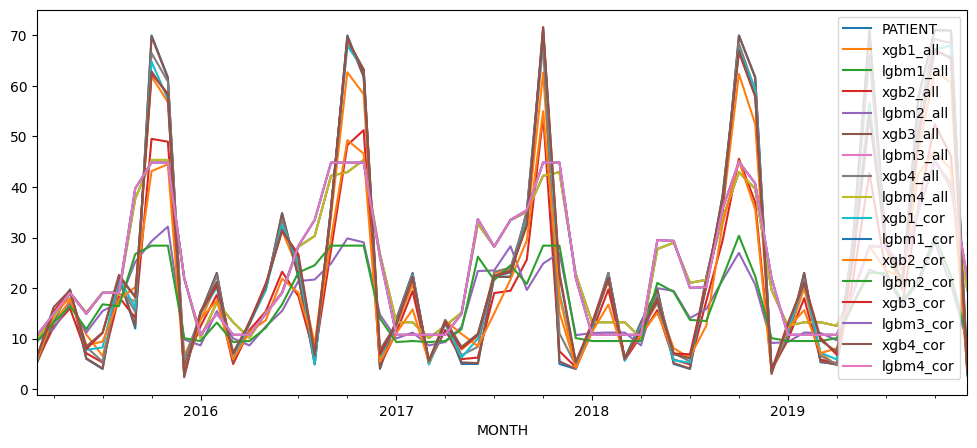

In [ ]:
result_train.plot(figsize=(12,5))
plt.show()

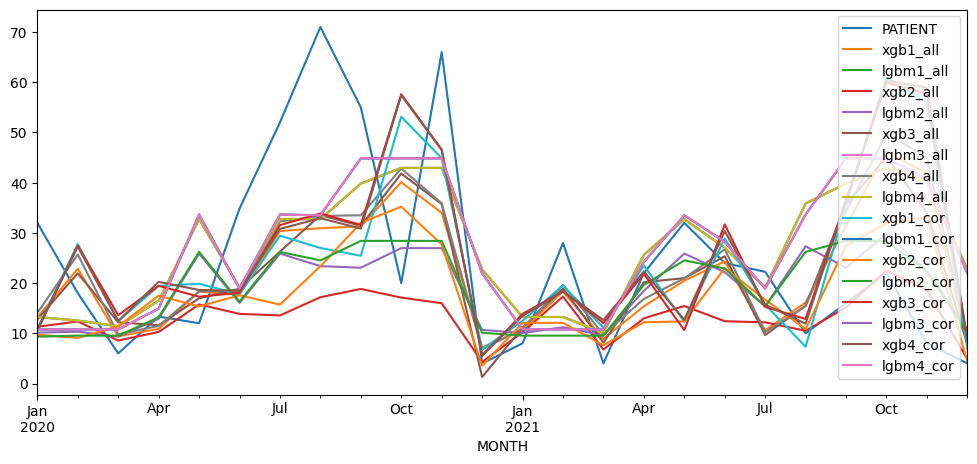

In [ ]:
result_valid.plot(figsize=(12,5))
plt.show()

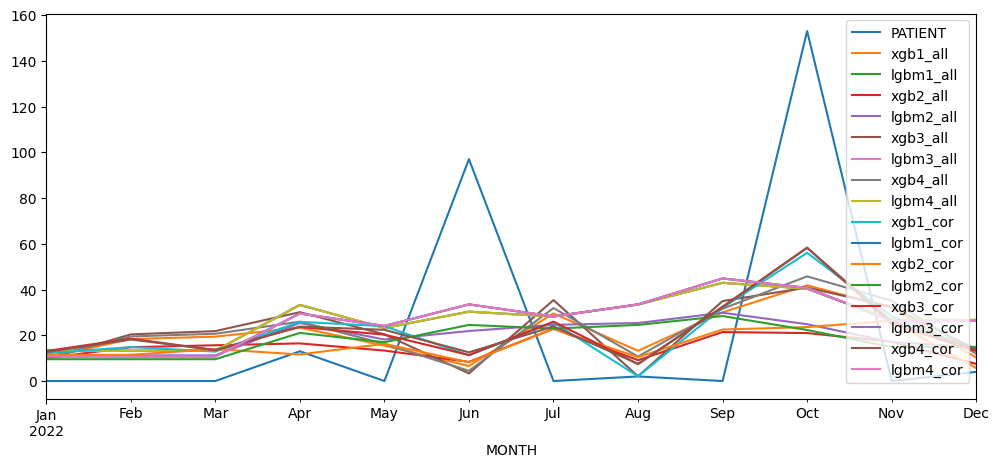

In [ ]:
result_test.plot(figsize=(12,5))
plt.show()

In [ ]:
result_train

,PATIENT,xgb1_all,lgbm1_all,xgb2_all,lgbm2_all,xgb3_all,lgbm3_all,xgb4_all,lgbm4_all,xgb1_cor,lgbm1_cor,xgb2_cor,lgbm2_cor,xgb3_cor,lgbm3_cor,xgb4_cor,lgbm4_cor
MONTH,,,,,,,,,,,,,,,,,
2015-03-31,5.333333,6.838411,10.123214,5.670078,9.588939,5.609388,10.123214,6.238879,10.123214,5.899194,10.765728,5.817420,9.531641,6.669513,10.765728,6.586906,10.765728
2015-04-30,13.333333,13.112350,14.080961,12.348723,11.953291,13.479907,14.080961,13.905115,14.080961,15.117750,14.921893,15.066865,13.182173,15.402161,14.921893,16.239012,14.921893
2015-05-31,19.750000,17.546614,19.089548,16.008280,16.995449,19.530575,19.089548,18.993332,19.089548,19.510908,19.069729,17.995989,16.429693,19.540270,19.069729,19.587152,19.069729
2015-06-30,6.000000,10.838781,15.131801,7.116157,11.218266,6.114122,15.131800,8.356585,15.131801,7.779819,14.913563,8.734558,11.879827,7.951795,14.913563,8.429728,14.913563
2015-07-31,4.000000,6.574370,19.089548,5.283930,15.476706,4.114015,19.089548,5.442529,19.089548,8.273884,19.069729,9.419481,16.789131,11.145708,19.069729,11.236972,19.069729
2015-08-31,22.200000,18.893509,19.089548,18.248685,17.128307,22.128294,19.089548,20.871778,19.089548,22.025253,19.069729,17.770985,16.429693,22.326578,19.069729,22.608610,19.069729
2015-09-30,12.000000,17.366032,37.689589,14.124664,25.176306,12.545797,37.689589,15.311026,37.689590,16.108585,39.715910,20.192168,26.729011,18.202471,39.715909,18.266142,39.715910
2015-10-31,70.000000,61.896378,45.356496,49.532896,29.285085,69.797035,45.356496,66.507561,45.356496,64.796951,44.845210,43.148760,28.405570,62.422382,44.845210,62.893539,44.845210
2015-11-30,61.750000,56.786018,45.356496,48.967972,32.158857,61.475285,45.356496,60.856537,45.356496,57.409477,44.845210,44.506064,28.405570,58.472202,44.845210,58.114079,44.845210


In [ ]:
def eval_(df):
  list_ = []
  RMSE = []
  MSE = []
  MAE = []

  for i in df.columns:
    if i == 'PATIENT':
      continue
    else:
      RMSE.append(mean_squared_error(df['PATIENT'], df[i], squared=False))
      MSE.append(mean_squared_error(df['PATIENT'], df[i], squared=True))
      MAE.append(mean_absolute_error(df['PATIENT'], df[i]))
      list_.append(i)

  df_eval = pd.DataFrame({'RMSE': RMSE,
                          'MSE': MSE,
                          'MAE':MAE}
                        ,index=list_)

  return df_eval

df_eval_train = eval_(result_train)
df_eval_valid = eval_(result_valid)
df_eval_test = eval_(result_test)

# display(df_eval_train)
# display(df_eval_valid)
# display(df_eval_test)